In [128]:
# Time for Classification Models
import time
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotx
import seaborn as sns
import scikitplot as skplt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
plt.style.use(matplotx.styles.dracula)


In [91]:
df=pd.read_csv('New_Bank_Data.csv')
df.head()

,age,balance,day,duration,campaign,pdays,previous,job_enc,marital_enc,education_enc,default_enc,housing_enc,loan_enc,contact_enc,month_enc,poutcome_enc,deposit_enc
0,59,2343,5,1042,1,-1,0,0,1,1,0,1,0,2,8,3,1
1,56,45,5,1467,1,-1,0,0,1,1,0,0,0,2,8,3,1
2,41,1270,5,1389,1,-1,0,9,1,1,0,1,0,2,8,3,1
3,55,2476,5,579,1,-1,0,7,1,1,0,1,0,2,8,3,1
4,54,184,5,673,2,-1,0,0,1,2,0,0,0,2,8,3,1


In [92]:
#data splitting
X=df.drop("deposit_enc",axis=1)
y=df["deposit_enc"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape

((8929, 16), (8929,))

In [93]:
dict_classifiers = [LogisticRegression(),KNeighborsClassifier(),SVC(),GradientBoostingClassifier(),tree.DecisionTreeClassifier(),RandomForestClassifier(n_estimators=18),
                   MLPClassifier(alpha=1),GaussianNB()]

In [94]:
for Model in dict_classifiers : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'Test accuracy_score  : { accuracy_score(y_test, y_pred)}')
    print('Test Precision Score: ', precision_score(y_test, y_pred))
    print('test Recall Score: ', recall_score(y_test, y_pred))
    print('test F1 Score: ',f1_score(y_test, y_pred))
   

    print('=================================================')

for Model LogisticRegression
Train Score is : 0.7627953858214805
Test Score is : 0.748320644872369
Test accuracy_score  : 0.748320644872369
Test Precision Score:  0.7487684729064039
test Recall Score:  0.7122774133083412
test F1 Score:  0.7300672430355427
for Model KNeighborsClassifier
Train Score is : 0.8203606226901109
Test Score is : 0.748320644872369
Test accuracy_score  : 0.748320644872369
Test Precision Score:  0.7425552353506244
test Recall Score:  0.7244611059044048
test F1 Score:  0.7333965844402276
for Model SVC
Train Score is : 0.7435323104490984
Test Score is : 0.7259292431706225
Test accuracy_score  : 0.7259292431706225
Test Precision Score:  0.7502750275027503
test Recall Score:  0.6391752577319587
test F1 Score:  0.6902834008097166
for Model GradientBoostingClassifier
Train Score is : 0.8607906820472617
Test Score is : 0.8217644424540976
Test accuracy_score  : 0.8217644424540976
Test Precision Score:  0.8005390835579514
test Recall Score:  0.8350515463917526
test F1 Scor

In [96]:
# Use Cross-validation.
# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()

# SVC
svc_clf = SVC()
svc_scores = cross_val_score(svc_clf, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()

# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# Decision Tree
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Gradient Boosting Classifier
grad_clf = GradientBoostingClassifier()
grad_scores = cross_val_score(grad_clf, X_train, y_train, cv=3)
grad_mean = grad_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# NeuralNet Classifier
neural_clf = MLPClassifier(alpha=1)
neural_scores = cross_val_score(neural_clf, X_train, y_train, cv=3)
neural_mean = neural_scores.mean()

# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = neural_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad B CLF', 'Rand FC', 'Neural Classifier', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, svc_mean, knn_mean, tree_mean, grad_mean, rand_mean, neural_mean, nav_mean]}

result_df = pd.DataFrame(data=d).sort_values(by='Crossval Mean Scores',ascending=False)

In [97]:
result_df

,Classifiers,Crossval Mean Scores
4,Grad B CLF,0.845447
5,Rand FC,0.832344
3,Dec Tree,0.776795
6,Neural Classifier,0.768956
7,Naives Bayes,0.768956
0,Logistic Reg.,0.757196
2,KNN,0.745659
1,SVC,0.738492


In [98]:
# Our three classifiers are grad_clf, nav_clf and neural_clf

voting_clf = VotingClassifier(
    estimators=[('gbc', grad_clf), ('Rand', rand_clf)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()),
                             ('Rand', RandomForestClassifier(n_estimators=18))],
                 voting='soft')

In [99]:
for clf in (grad_clf, rand_clf, voting_clf):
    clf.fit(X_train, y_train)
    predict = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, predict))

GradientBoostingClassifier 0.8217644424540976
RandomForestClassifier 0.8244514106583072
VotingClassifier 0.8222122704881325


In [108]:
predicted_probas =voting_clf.predict_proba(X_test)

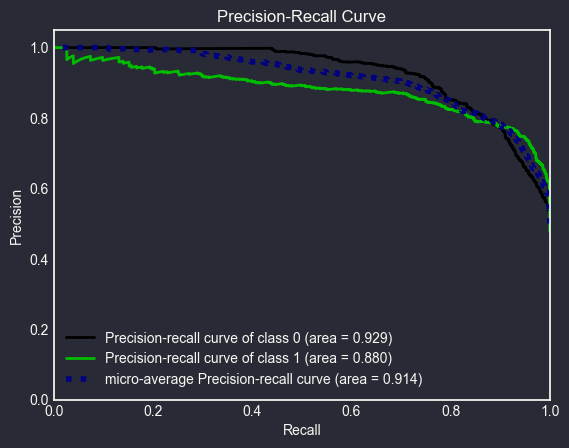

In [126]:
skplt.metrics.plot_precision_recall_curve(y_test, predicted_probas)
plt.show()

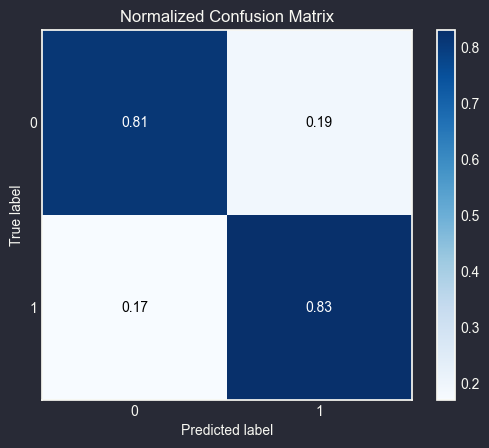

In [127]:
predictions = cross_val_predict(voting_clf, X_test, y_test)
plot = skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=True)


In [102]:
# save the model to disk
filename = 'Class_Model.pkl'
pickle.dump(voting_clf, open(filename, 'wb'))